### Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

Загрузка и первичный анализ данных

In [31]:
df = pd.read_csv('GM_players_statistics.csv')

In [32]:
df.shape

(1508, 35)

In [33]:
df.dtypes

Unnamed: 0                     int64
name                          object
username                      object
profile                       object
user_id                        int64
title                         object
fide                         float64
country                       object
followers                      int64
joined                        object
last_online                   object
current_rapid_rating         float64
highest_rapid_rating         float64
highest_rapid_date            object
rapid_win                    float64
rapid_draw                   float64
rapid_loss                   float64
current_blitz_rating         float64
highest_blitz_rating         float64
highest_blitz_date            object
blitz_win                    float64
blitz_draw                   float64
blitz_loss                   float64
current_bullet_rating        float64
highest_bullet_rating        float64
highest_bullet_date           object
bullet_win                   float64
b

In [34]:
df.isnull().sum()

Unnamed: 0                     0
name                         267
username                       0
profile                        0
user_id                        0
title                          0
fide                         595
country                        0
followers                      0
joined                         0
last_online                    0
current_rapid_rating         453
highest_rapid_rating         511
highest_rapid_date           511
rapid_win                    453
rapid_draw                   453
rapid_loss                   453
current_blitz_rating         120
highest_blitz_rating         126
highest_blitz_date           126
blitz_win                    120
blitz_draw                   120
blitz_loss                   120
current_bullet_rating        335
highest_bullet_rating        364
highest_bullet_date          364
bullet_win                   335
bullet_draw                  335
bullet_loss                  335
highest_tactics_rating         0
highest_ta

In [35]:
df.head()

,Unnamed: 0,name,username,profile,user_id,title,fide,country,followers,joined,...,highest_bullet_date,bullet_win,bullet_draw,bullet_loss,highest_tactics_rating,highest_tactics_date,highest_puzzle_rush_score,is_streamer,status,league
0,0,Komodo Engine,komodochess,https://www.chess.com/member/KomodoChess,24944922,GM,3411.0,United States,494,07/11/2015,...,NaN,NaN,NaN,NaN,400,07/11/2015,NaN,False,premium,NaN
1,1,Vojtěch Plát,vojtechplat,https://www.chess.com/member/VojtechPlat,37712368,GM,2950.0,Czech Republic,360,11/08/2017,...,27/09/2021,32.0,8.0,47.0,3251,15/09/2021,49.0,False,premium,Bronze
2,2,PlayMagnus Carlsen,playmagnus,https://www.chess.com/member/PlayMagnus,19578862,GM,2882.0,Norway,199,05/11/2014,...,NaN,NaN,NaN,NaN,400,05/11/2014,NaN,False,premium,NaN
3,3,Magnus Carlsen,magnuscarlsen,https://www.chess.com/member/MagnusCarlsen,3889224,GM,2882.0,Norway,142482,27/08/2010,...,28/03/2023,662.0,98.0,246.0,400,27/08/2010,NaN,False,premium,Elite
4,4,Fabiano Caruana,fabianocaruana,https://www.chess.com/member/FabianoCaruana,11177810,GM,2835.0,United States,14445,17/03/2013,...,30/11/2021,713.0,65.0,203.0,3519,14/06/2023,64.0,False,premium,Crystal


In [36]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1508


## Обработка пропусков в данных

##### Простые стратегии - удаление или заполенение нулями

In [37]:
df_new_1 = df.dropna(axis=1, how='any')
(df.shape, df_new_1.shape)

((1508, 35), (1508, 13))

In [38]:
df_new_2 = df.dropna(axis=0, how='any')
(df.shape, df_new_2.shape)

((1508, 35), (433, 35))

In [39]:
df_new_3 = df.fillna(0)
df_new_3.head()

,Unnamed: 0,name,username,profile,user_id,title,fide,country,followers,joined,...,highest_bullet_date,bullet_win,bullet_draw,bullet_loss,highest_tactics_rating,highest_tactics_date,highest_puzzle_rush_score,is_streamer,status,league
0,0,Komodo Engine,komodochess,https://www.chess.com/member/KomodoChess,24944922,GM,3411.0,United States,494,07/11/2015,...,0,0.0,0.0,0.0,400,07/11/2015,0.0,False,premium,0
1,1,Vojtěch Plát,vojtechplat,https://www.chess.com/member/VojtechPlat,37712368,GM,2950.0,Czech Republic,360,11/08/2017,...,27/09/2021,32.0,8.0,47.0,3251,15/09/2021,49.0,False,premium,Bronze
2,2,PlayMagnus Carlsen,playmagnus,https://www.chess.com/member/PlayMagnus,19578862,GM,2882.0,Norway,199,05/11/2014,...,0,0.0,0.0,0.0,400,05/11/2014,0.0,False,premium,0
3,3,Magnus Carlsen,magnuscarlsen,https://www.chess.com/member/MagnusCarlsen,3889224,GM,2882.0,Norway,142482,27/08/2010,...,28/03/2023,662.0,98.0,246.0,400,27/08/2010,0.0,False,premium,Elite
4,4,Fabiano Caruana,fabianocaruana,https://www.chess.com/member/FabianoCaruana,11177810,GM,2835.0,United States,14445,17/03/2013,...,30/11/2021,713.0,65.0,203.0,3519,14/06/2023,64.0,False,premium,Crystal


##### Imputation

In [40]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in df.columns:
    # Количество пустых значений 
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка fide. Тип данных float64. Количество пустых значений 595, 39.46%.
Колонка current_rapid_rating. Тип данных float64. Количество пустых значений 453, 30.04%.
Колонка highest_rapid_rating. Тип данных float64. Количество пустых значений 511, 33.89%.
Колонка rapid_win. Тип данных float64. Количество пустых значений 453, 30.04%.
Колонка rapid_draw. Тип данных float64. Количество пустых значений 453, 30.04%.
Колонка rapid_loss. Тип данных float64. Количество пустых значений 453, 30.04%.
Колонка current_blitz_rating. Тип данных float64. Количество пустых значений 120, 7.96%.
Колонка highest_blitz_rating. Тип данных float64. Количество пустых значений 126, 8.36%.
Колонка blitz_win. Тип данных float64. Количество пустых значений 120, 7.96%.
Колонка blitz_draw. Тип данных float64. Количество пустых значений 120, 7.96%.
Колонка blitz_loss. Тип данных float64. Количество пустых значений 120, 7.96%.
Колонка current_bullet_rating. Тип данных float64. Количество пустых значений 335, 22.21%.
Ко

In [41]:
# Фильтр по колонкам с пропущенными значениями
data_num = df[num_cols]
data_num

,fide,current_rapid_rating,highest_rapid_rating,rapid_win,rapid_draw,rapid_loss,current_blitz_rating,highest_blitz_rating,blitz_win,blitz_draw,blitz_loss,current_bullet_rating,highest_bullet_rating,bullet_win,bullet_draw,bullet_loss,highest_puzzle_rush_score
0,3411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2950.0,2383.0,2672.0,12.0,5.0,6.0,2823.0,2914.0,976.0,280.0,847.0,2661.0,2750.0,32.0,8.0,47.0,49.0
2,2882.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2882.0,2925.0,2977.0,43.0,23.0,8.0,3287.0,3322.0,1402.0,292.0,334.0,3249.0,3390.0,662.0,98.0,246.0,NaN
4,2835.0,2794.0,3045.0,122.0,103.0,46.0,3125.0,3136.0,1012.0,194.0,322.0,3030.0,3113.0,713.0,65.0,203.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,NaN,NaN,NaN,NaN,NaN,NaN,2375.0,2430.0,50.0,9.0,27.0,2102.0,2083.0,13.0,1.0,7.0,NaN
1504,NaN,2375.0,2555.0,7.0,2.0,6.0,2415.0,2675.0,3293.0,538.0,2521.0,2400.0,2594.0,496.0,47.0,402.0,44.0
1505,NaN,NaN,NaN,NaN,NaN,NaN,2961.0,2967.0,338.0,22.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN
1506,NaN,NaN,NaN,NaN,NaN,NaN,2771.0,2763.0,138.0,3.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN


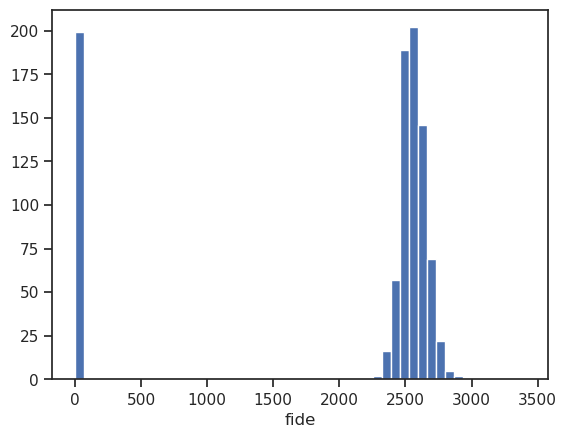

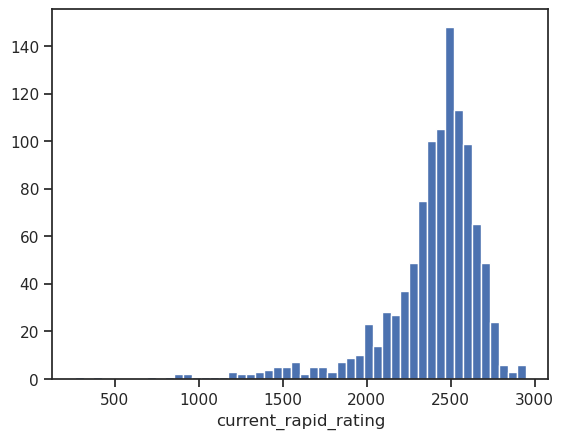

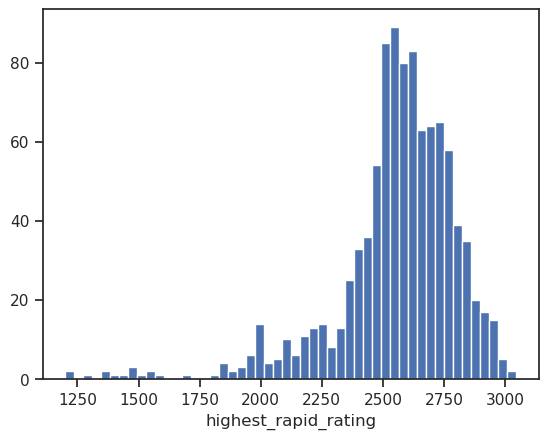

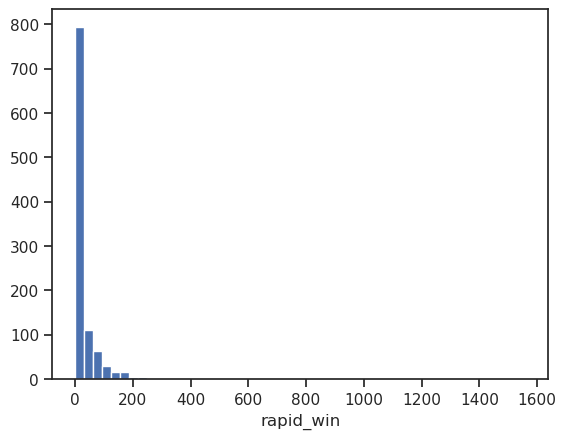

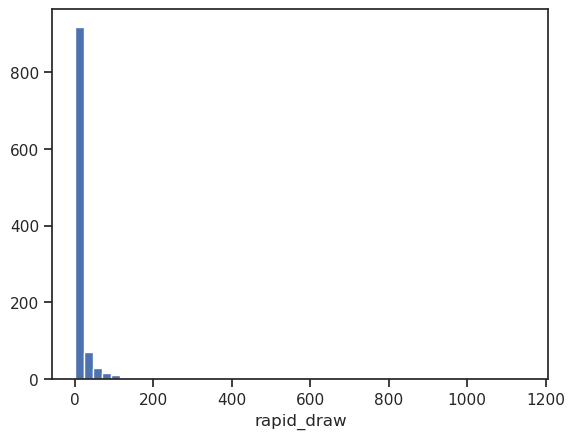

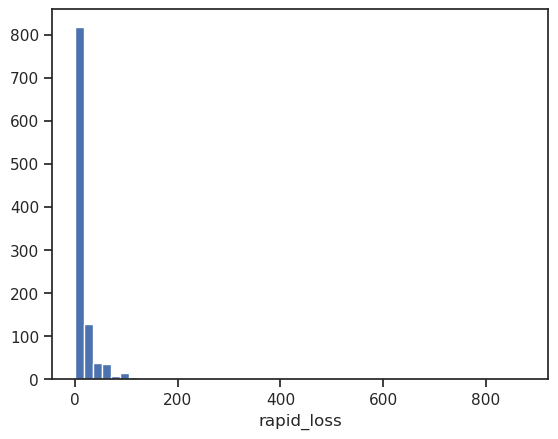

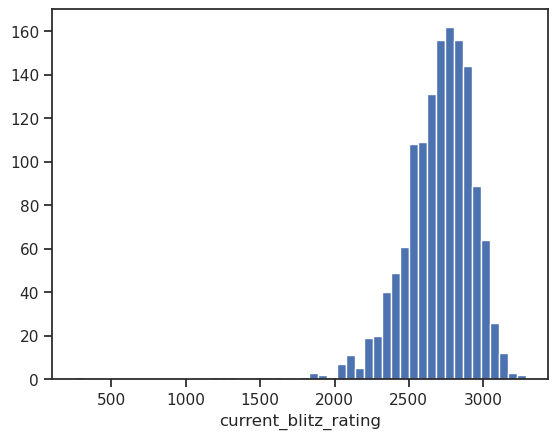

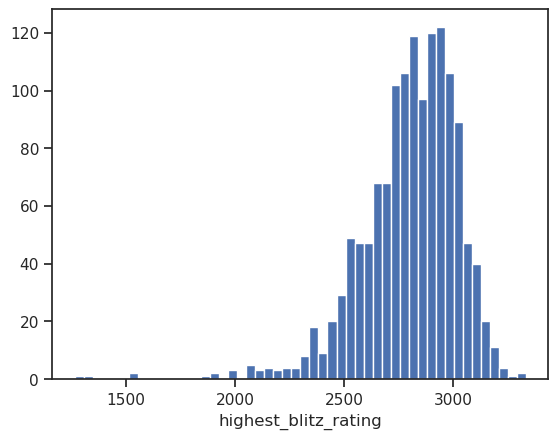

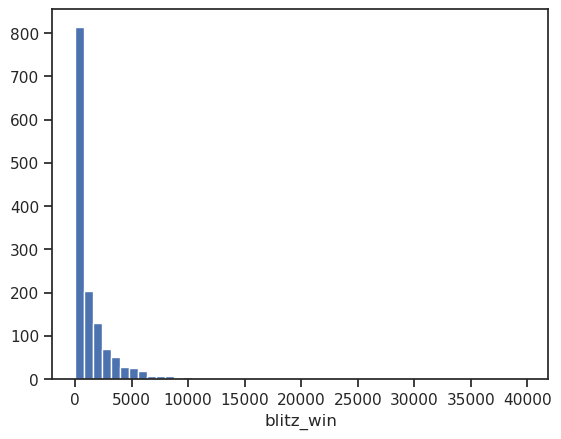

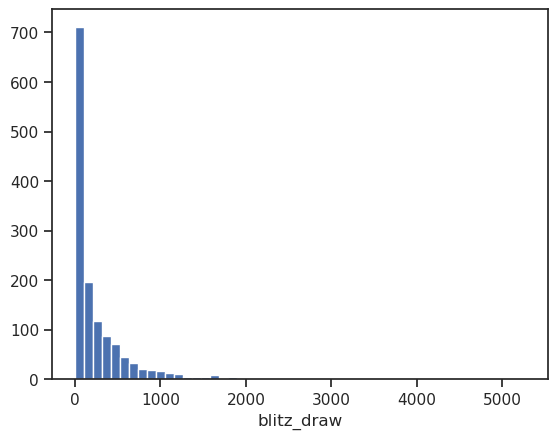

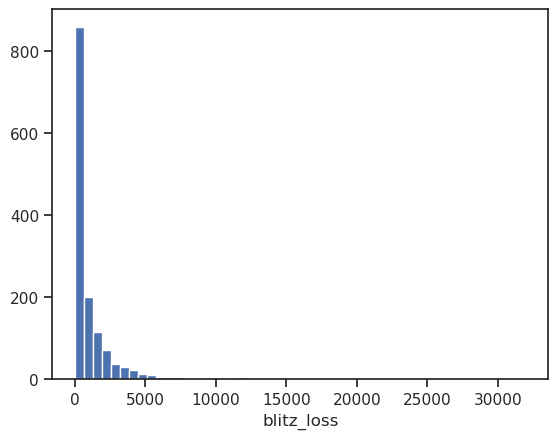

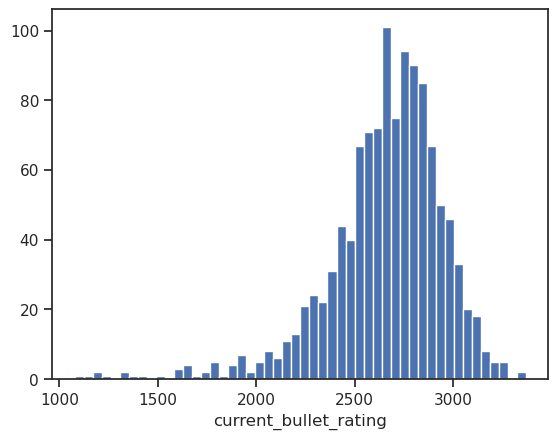

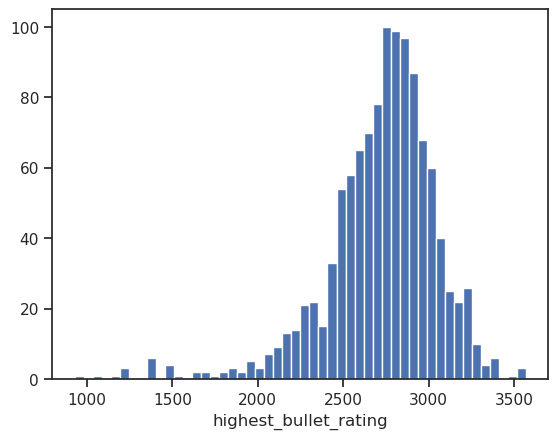

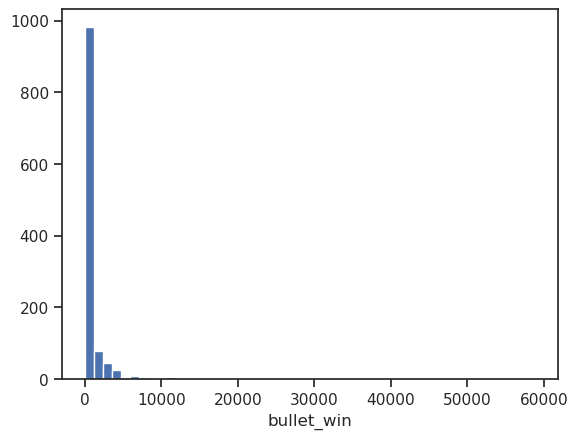

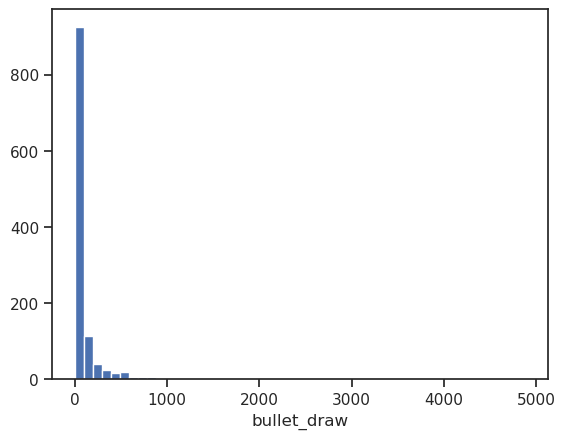

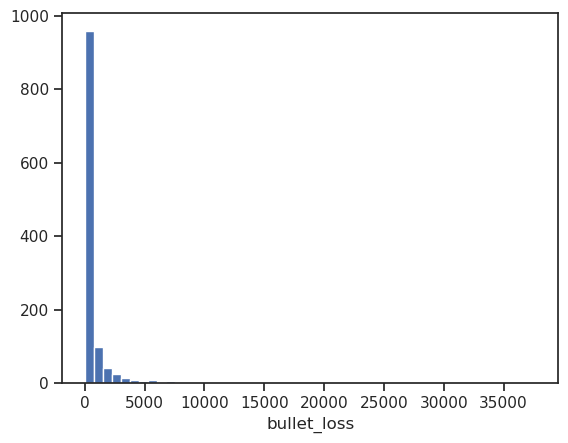

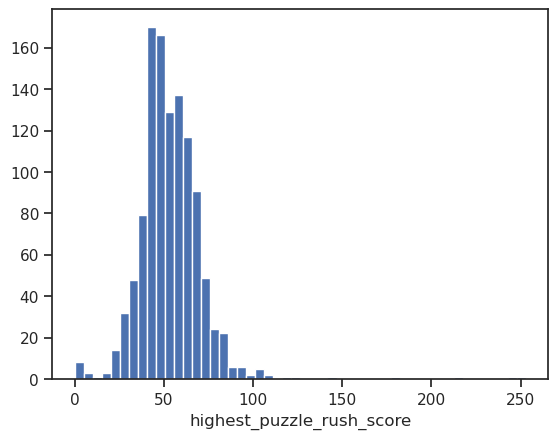

In [42]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(df[col], 50)
    plt.xlabel(col)
    plt.show()

In [43]:
data_num_fide = data_num[['fide']]
data_num_fide.head()

,fide
0,3411.0
1,2950.0
2,2882.0
3,2882.0
4,2835.0


In [44]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [45]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_fide)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [46]:
strategies=['mean', 'median', 'most_frequent']

In [47]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_fide)
    return data_num_imp[mask_missing_values_only]

In [48]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2

In [49]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 25

In [50]:
strategies[2], test_num_impute(strategies[2])


('most_frequent',
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [51]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [52]:
df[['fide']].describe()

,fide
count,913.000000
mean,2002.937568
std,1061.740709
min,0.000000
25%,2405.000000
50%,2523.000000
75%,2600.000000
max,3411.000000


In [53]:
test_num_impute_col(df, 'fide', strategies[0])

('fide', 'mean', 595, 2002.9375684556408, 2002.9375684556408)

In [54]:
test_num_impute_col(df, 'fide', strategies[1])

('fide', 'median', 595, 2523.0, 2523.0)

In [55]:
test_num_impute_col(df, 'fide', strategies[2])

('fide', 'most_frequent', 595, 0.0, 0.0)

In [56]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in df.columns:
    # Количество пустых значений 
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка name. Тип данных object. Количество пустых значений 267, 17.71%.
Колонка highest_rapid_date. Тип данных object. Количество пустых значений 511, 33.89%.
Колонка highest_blitz_date. Тип данных object. Количество пустых значений 126, 8.36%.
Колонка highest_bullet_date. Тип данных object. Количество пустых значений 364, 24.14%.
Колонка league. Тип данных object. Количество пустых значений 380, 25.2%.
